In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pls
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
import os
from PIL import Image
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import cv2
import skimage

# Import Greek Data

In [22]:
greek_data_path = r"/Users/AdamHarris/Desktop/GreekCardinalityProximityInvariance/Images"
greek_list = os.listdir(greek_data_path) 
num_greek_samples = np.size(greek_list)
print(num_greek_samples)
greek_list.sort()
greek_labels = np.loadtxt('/Users/AdamHarris/Desktop/GreekCardinalityProximityInvariance/labels.csv', delimiter=',', skiprows=0)
greek_labels = greek_labels.astype(np.uint8)
greek_labels = greek_labels[:,4]
print(len(greek_labels))

im = Image.open(greek_data_path + '/' + greek_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(greek_list)
print(m, n, num_images)
greek_images = np.array([np.array(Image.open(greek_data_path + '/' + fname)) for fname in greek_list])

10000
10000
100 100 10000


In [32]:
greek_black_pixel_counts = np.zeros((10000, 1))
                                    
for i in range(len(greek_black_pixel_counts)):
    greek_black_pixel_counts[i] = (np.shape(greek_images[i])[0] * np.shape(greek_images[i])[1]) - np.count_nonzero(greek_images[i])

In [33]:
print(greek_black_pixel_counts)

[[ 44.]
 [362.]
 [423.]
 ...
 [138.]
 [100.]
 [123.]]


<function show at 0x116ffb620>

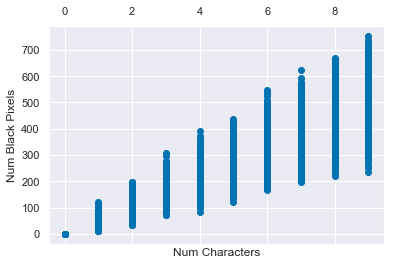

In [144]:
plt.scatter(greek_labels, greek_black_pixel_counts)
plt.xlabel('Num Characters')
plt.ylabel('Num Black Pixels')
plt.show

In [88]:
y = greek_labels[0:8000].reshape(-1,1)
x = greek_black_pixel_counts[0:8000].reshape(-1,1)

In [89]:
linreg = LinearRegression(normalize = True)
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [90]:
print(linreg.score(x, y))

0.8180792251106508


In [95]:
y_pred = linreg.predict(greek_black_pixel_counts[8000:10000])
y_predint = y_pred.astype(np.uint8)
print(np.shape(y_pred))

(2000, 1)


In [96]:
y_test = greek_labels[8000:10000] 
x_test = greek_black_pixel_counts[8000:10000]
df = pd.DataFrame({'Actual': greek_labels[8000:10000].flatten(), 'Predicted': y_predint.flatten()})
df

,Actual,Predicted
0,8,9
1,2,2
2,6,5
3,2,2
4,2,3
5,2,2
6,6,7
7,9,10
8,1,1
9,7,3


In [97]:
correct = 0
for i in range(len(y_pred)):
    if y_test[i] == y_predint[i]:
        correct += 1
accuracy = correct / len(y_pred)
print('accuracy = ' + str(accuracy))

accuracy = 0.4265


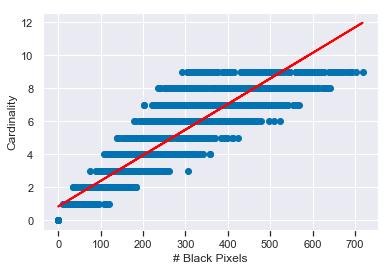

In [145]:
import seaborn as sns
sns.set(palette="colorblind")#(style = "grey", palette="colorblind")
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('# Black Pixels')
plt.ylabel('Cardinality')
plt.show()

In [87]:
#To retrieve the intercept:
print(linreg.intercept_)
#For retrieving the slope:
print(linreg.coef_)

[0.83140954]
[[0.01552887]]


In [127]:
savefolder = r'/Users/AdamHarris/Desktop/CardinalityRegressionTest'
greek_predictions_matrix = np.zeros((10, 13), dtype = np.float64)
for c in range(10):
    for i in range(13):
        count = 0
        for d in range(2000):
            count = count + np.sum(y_predint[d] == i and y_test[d] == c)
        greek_predictions_matrix[c, i] = count
greek_predictions_matrix = np.transpose(greek_predictions_matrix)
print(greek_predictions_matrix)
normalised_greek_predictions_matrix = np.zeros((13, 10), dtype = np.float64)
for c in range(13):
    for i in range(10):
       normalised_greek_predictions_matrix[c, i] = greek_predictions_matrix[c, i] / np.sum(greek_predictions_matrix[:, i])
print(normalised_greek_predictions_matrix)
df_normalised_greek_predictions_matrix = pd.DataFrame(normalised_greek_predictions_matrix)
df_normalised_greek_predictions_matrix.to_csv(savefolder + 'greek_regression_Predictions.csv')

[[220.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 206.  48.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  17. 117.  71.  16.   2.   0.   0.   0.   0.]
 [  0.   0.  28.  85.  68.  63.   7.   2.   0.   0.]
 [  0.   0.   0.  31.  72.  45.  51.  39.  10.   0.]
 [  0.   0.   0.   1.  41.  42.  42.  40.  54.  27.]
 [  0.   0.   0.   0.   4.  22.  26.  35.  28.  55.]
 [  0.   0.   0.   0.   0.   5.  40.  28.  47.  33.]
 [  0.   0.   0.   0.   0.   0.   6.  34.  33.  32.]
 [  0.   0.   0.   0.   0.   0.   0.   9.  37.  24.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  14.  31.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  12.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.92376682 0.24870466 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.07623318 0.60621762 0.37765957 0.07960199 0.01117318
  0.         0.         0.  

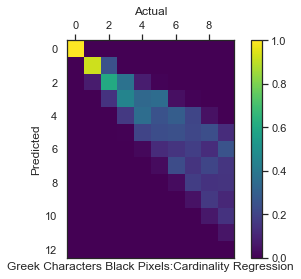

In [128]:
sns.set(style='white')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.imshow(normalised_greek_predictions_matrix, cmap = 'viridis')
plt.colorbar()
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel('Greek Characters Black Pixels:Cardinality Regression')
plt.show()

In [126]:
print(np.max(y_pred))

11.98114119753008


# Import Angelic Data

In [129]:
angelic_data_path = r"/Users/AdamHarris/Desktop/AngelicCardinalityProximityInvariance/Images"
angelic_list = os.listdir(angelic_data_path) 
num_angelic_samples = np.size(angelic_list)
print(num_angelic_samples)
angelic_list.sort()
angelic_labels = np.loadtxt('/Users/AdamHarris/Desktop/AngelicCardinalityProximityInvariance/labels.csv', delimiter=',', skiprows=0)
angelic_labels = angelic_labels.astype(np.uint8)
angelic_labels = angelic_labels[:,4]
print(len(angelic_labels))

2000
2000


In [130]:
im = Image.open(angelic_data_path + '/' + angelic_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(angelic_list)
print(m, n, num_images)
angelic_images = np.array([np.array(Image.open(angelic_data_path + '/' + fname)) for fname in angelic_list])

100 100 2000


In [131]:
angelic_black_pixel_counts = np.zeros((2000, 1))
                                    
for i in range(len(angelic_black_pixel_counts)):
    angelic_black_pixel_counts[i] = (np.shape(angelic_images[i])[0] * np.shape(angelic_images[i])[1]) - np.count_nonzero(angelic_images[i])

In [132]:
y_pred_angelic = linreg.predict(angelic_black_pixel_counts)
y_pred_angelicint = y_pred.astype(np.uint8)
print(np.shape(y_pred_angelic))

(2000, 1)


In [134]:
df_angelic = pd.DataFrame({'Actual': angelic_labels.flatten(), 'Predicted': y_pred_angelicint.flatten()})
df_angelic

,Actual,Predicted
0,4,9
1,7,2
2,2,5
3,2,2
4,8,3
5,8,2
6,9,7
7,0,10
8,3,1
9,8,3


In [137]:
correct = 0
for i in range(len(y_pred)):
    if angelic_labels[i] == y_pred_angelicint[i]:
        correct += 1
accuracy = correct / len(y_pred_angelic)
print('accuracy = ' + str(accuracy))

accuracy = 0.086


In [138]:
print(np.max(y_pred_angelicint))

11
